# ==============================================
# TUGAS PRAKTIKUM MANDIRI 5 — DECISION TREE
# Dataset: Iris.csv
# Nama: Muhammad Rizqi Nurrohmat
# NIM: 0110224001
# ==============================================

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset

In [2]:
df = pd.read_csv("../data/Iris.csv")

# Menampilkan 5 data teratas
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Mengecek Informasi Dataset

In [3]:
# Melihat informasi umum dataset
df.info()

# Melihat distribusi target
df['Species'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Menentukan Fitur dan Target

In [4]:
# Menentukan kolom fitur (X) dan target (y)
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_cols]
y = df['Species']

# Membagi Data training dan testing

In [5]:
# Membagi dataset menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data training:", len(X_train))
print("Jumlah data testing :", len(X_test))

Jumlah data training: 120
Jumlah data testing : 30


# Membangun Model Decision Tree

In [6]:
# Membuat model Decision Tree
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)

# Melatih model dengan data training
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Prediksi Data Testing

In [8]:
y_pred = dt.predict(X_test)

# Evaluasi Model

In [9]:
# Menghitung akurasi dan menampilkan hasil evaluasi
print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 93.33 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



# Visualisasi Decision Tree

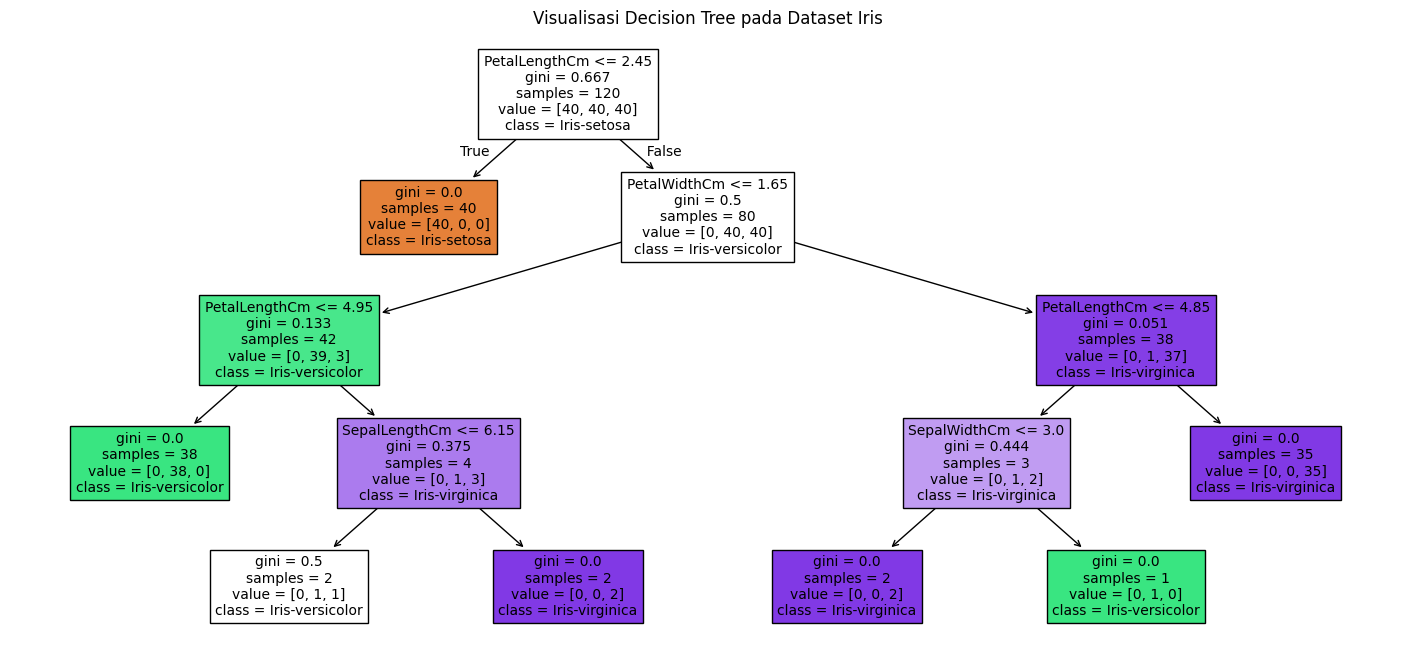

In [10]:
plt.figure(figsize=(18, 8))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=dt.classes_,
    filled=True,
    fontsize=10
)
plt.title("Visualisasi Decision Tree pada Dataset Iris")
plt.show()

# Uji model dengan data testing

In [11]:
test_sample = X_test.iloc[:5]
print("Data Uji:\n", test_sample)
print("\nPrediksi Model:\n", dt.predict(test_sample))
print("\nLabel Sebenarnya:\n", y_test.iloc[:5].values)

Data Uji:
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
38             4.4           3.0            1.3           0.2
127            6.1           3.0            4.9           1.8
57             4.9           2.4            3.3           1.0
93             5.0           2.3            3.3           1.0
42             4.4           3.2            1.3           0.2

Prediksi Model:
 ['Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa']

Label Sebenarnya:
 ['Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa']
